# Text classification
Tokenized text sequences are input to the embedding layer. The output from the embedding layer is a 2-D matrix floating point values measuring M by N, where M is the number of dimensions in the embedding space and N is the sequence length. The flatten layer following the embedding layer flattened the 2-D output into a 1D array suitable for input to a dense layer, and the dense layer classifies the values emitted from the flatten layer. You can experiment with different dimensions in the embedding layer and different widths in the dense layer to maximize accuracy. You can also add more dense layers if needed.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
model = Sequential()
model.add(Embedding(1000, 32, input_length=100))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(padded_sequences, labels, epochs=10, verbose=1)

/Users/devonrasch/Documents/repos/NLP-Techniques/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Download data from o'reliy 
https://oreil.ly/jWEyN


In [10]:
import pandas as pd

df = pd.read_csv('../Data/ham-spam.csv', encoding='latin-1')
df = df.sample(frac=1, random_state=0)
df.head()



,IsSpam,Text
993,1,utf date course utf diminish weight our table...
859,1,utf any drugs eur utf for dose have you ever ...
298,0,expert finderhttps expertfinder enron com
553,1,and courtiers ministerssubsegment founded res...
672,1,for our clients fargo dear customer have updat...


In [11]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499         expert finderhttps expertfinder enron com     1
1        500    500   utf date course utf diminish weight our table...    1

In [14]:
x = df['Text']
y = df['IsSpam']

max_words = 1000
max_len = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)

sequences = tokenizer.texts_to_sequences(x)
x = pad_sequences(sequences, maxlen=max_len)

In [17]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_len))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 20% of the data is used for validation
hist = model.fit(x, y, epochs=5, batch_size=20, validation_split=0.2)

Epoch 1/5


/Users/devonrasch/Documents/repos/NLP-Techniques/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6683 - loss: 0.5912 - val_accuracy: 0.8050 - val_loss: 0.4377
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9199 - loss: 0.2481 - val_accuracy: 0.9350 - val_loss: 0.1808
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9700 - loss: 0.1003 - val_accuracy: 0.9450 - val_loss: 0.1437
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9875 - loss: 0.0518 - val_accuracy: 0.9550 - val_loss: 0.1354
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9862 - loss: 0.0349 - val_accuracy: 0.9550 - val_loss: 0.1454


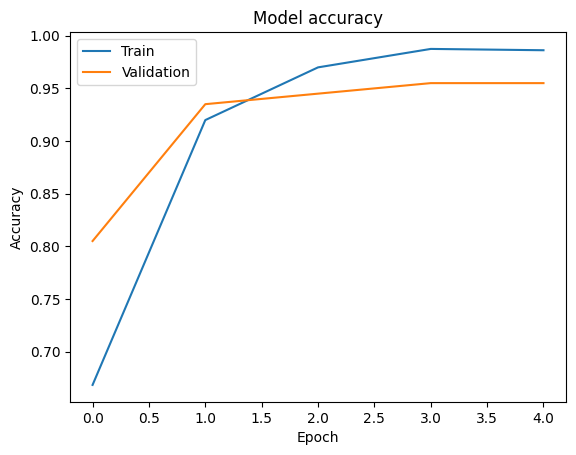

In [19]:
# viz

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
# Compute probabilities

text = 'Can you send me the link to the article?' \
'I need to read it.'

sequences = tokenizer.texts_to_sequences([text])
sequences = pad_sequences(sequences, maxlen=max_len)

predictions = model.predict(sequences)
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.7952071]], dtype=float32)

In [22]:
text = 'Can you attend a code review on Monday? ' \
    'Need to discuss the project and make sure the logic is rock solid.'

sequences = tokenizer.texts_to_sequences([text])
sequences = pad_sequences(sequences, maxlen=max_len)

predictions = model.predict(sequences)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.22553091]], dtype=float32)